In [40]:
import tensorflow

In [41]:
from tensorflow.keras.applications import VGG16

In [42]:
model = VGG16(weights='imagenet')

In [43]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

In [44]:
pic = image.load_img('index.jpg',target_size = (224,224))

In [45]:
img = image.img_to_array(pic)

In [46]:
import numpy as np

In [47]:
img = np.expand_dims(img,axis = 0)

In [48]:
img = preprocess_input(img) #image Normalisation across channel

In [49]:
pred = model.predict(img)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [50]:
decode_predictions(pred)

[[('n01774750', 'tarantula', 0.08657921),
  ('n02328150', 'Angora', 0.07573672),
  ('n02111500', 'Great_Pyrenees', 0.04165033),
  ('n03724870', 'mask', 0.03735326),
  ('n03958227', 'plastic_bag', 0.036849365)]]

In [51]:
np.argmax(pred[0]) #list of lists #index of unit which activated this

76

In [52]:
# Setup a Grad Cam Process

In [53]:
class_output = model.output[:,76]

In [54]:
last_layer_conv = model.get_layer('block5_conv3')

In [55]:
# calculate gradient of class with respect to output layer

In [56]:
from tensorflow.keras import backend as k
tensorflow.compat.v1.disable_eager_execution()

In [58]:
grad = k.gradients(class_output,last_layer_conv.output)[0]

In [59]:
pooled_grad = k.mean(grad,axis=(0,1,2))  #getting the mean which instensity of  the gradient over specific feauture map channel

In [60]:
iterate = k.function([model.input],[pooled_grad,last_layer_conv.output[0]]) #let us access the grad and output , given an image

In [61]:
pooled_grad_vale,conv_layer_output_value = iterate([img])

In [64]:
for i in range(512):
  conv_layer_output_value[:,:,i]*=pooled_grad_vale[i]

In [78]:
heatmap = np.mean(conv_layer_output_value,axis = -1) #channel wise mean is the heatmap of the class activation

In [79]:
heatmap = np.maximum(heatmap,0)

In [80]:
heatmap/=np.max(heatmap)

In [81]:
import matplotlib.pyplot as plt

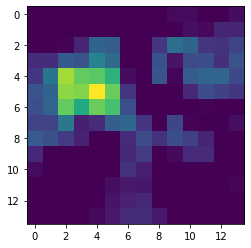

In [82]:
plt.imshow(heatmap)

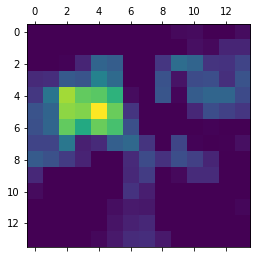

In [83]:
plt.matshow(heatmap)

In [73]:
# Use openCV to superimpose heat map over the actual image

In [74]:
import cv2

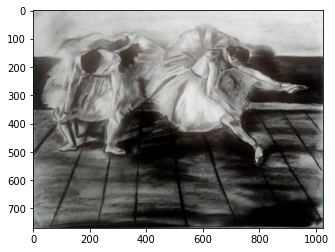

In [89]:
image = cv2.imread('index.jpg')
plt.imshow(image)

In [84]:
heatmap = cv2.resize(heatmap,(image.shape[1],image.shape[0]))

In [85]:
heatmap = np.uint8(255*heatmap)

In [86]:
heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)

In [87]:
superimposed_img = heatmap*0.4+image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


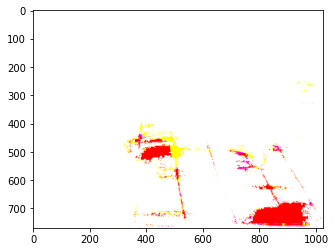

In [88]:
plt.imshow(superimposed_img)

In [90]:
cv2.imwrite('new_image.jpg',superimposed_img)

True

In [92]:
i = cv2.imread('new_image.jpg')

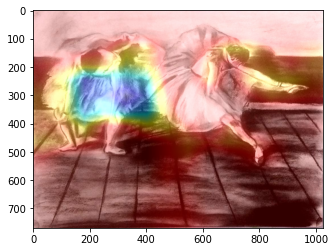

In [93]:
plt.imshow(i)